In [18]:
import numpy as np

def criaDatasetBidimensionalBinárioInclinado(n=20, slop=[2, 1], intercept=0.4):
    """
    Cria um dataset bidimensional binário com
    inclinação e interceptação do eixo vertical
    parametrizados.
    """
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
X, y = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept)
X, y

(array([[0.48758071, 0.92554646],
        [0.32335089, 0.34234385],
        [0.43877783, 0.38276819],
        [0.45400071, 0.65486755],
        [0.96016336, 0.10295987],
        [0.25841212, 0.34579846],
        [0.82530591, 0.42934964],
        [0.47741442, 0.90306469],
        [0.45328507, 0.62223763],
        [0.18771831, 0.09749789],
        [0.69642099, 0.85552926],
        [0.8293226 , 0.86463485],
        [0.94156372, 0.21351221],
        [0.11377047, 0.68490236],
        [0.442321  , 0.01022844],
        [0.24766393, 0.51304451],
        [0.093499  , 0.82529719],
        [0.84226037, 0.54118361],
        [0.5165197 , 0.13838727],
        [0.79569234, 0.10907645]]),
 array([-1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
         1,  1,  1]))

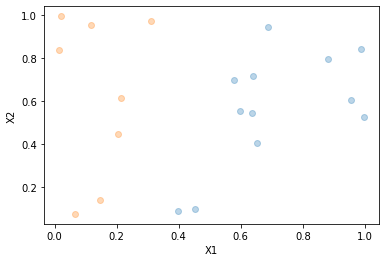

In [19]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

X, y = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept)
plotaDatasetBidimensional(X, y)

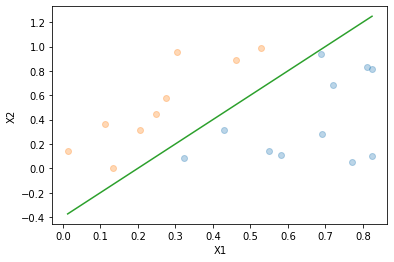

In [25]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo horizontal.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

X, y = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(X, y, vetor_hyperplano, intercept)

1.0
[ -5.39423263  35.31500609 -19.78917921]


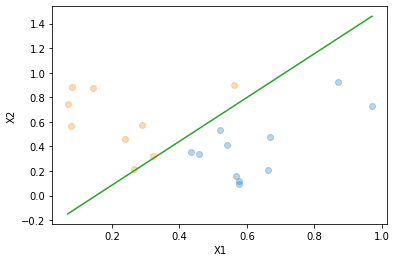

In [27]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def signal(a):
    return (a >= 0) * 2 - 1

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado em batch.
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = signal
        self.max_iter = max_iter
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            self.w += np.matmul(Xb.T, erros)

    def predict(self, X):
        Xb = Perceptron.includebias(X)
        a = np.matmul(Xb, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
X, y = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(X, y, perceptron.w[1:], perceptron.w[0])


1.0


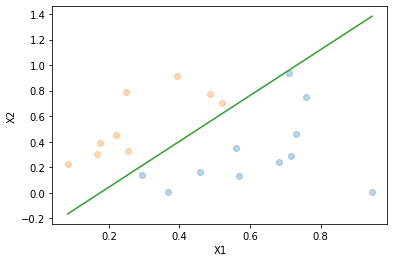

0.992


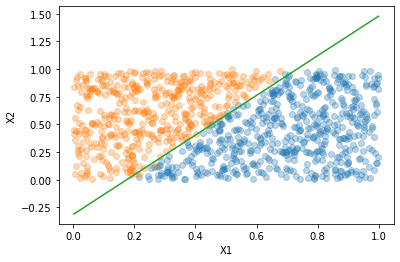

In [34]:
X, y = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept)
perceptron = Perceptron()
perceptron.fit(X, y)
print(sum(y == perceptron.predict(X))/len(y))
plotaHiperplanoDatasetBidimensional(X, y, perceptron.w[1:], perceptron.w[0])
plt.show()

X, y = criaDatasetBidimensionalBinárioInclinado(n=1000, slop=slop, intercept=intercept)
print(sum(y == perceptron.predict(X))/len(y))
plotaHiperplanoDatasetBidimensional(X, y, perceptron.w[1:], perceptron.w[0])
